In [36]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df  = pd.read_csv("C://Users//Raj-Lenovo//Desktop//FORE//TERM-3//MLP//Coding//loan-predication.csv")

In [3]:
df.head()
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.loc[df['Loan_Status'] =='Y', 'Loan_Status_New'] = 1
df.loc[df['Loan_Status'] =='N', 'Loan_Status_New'] = 0
df.loc[df['Education'] =='Graduate', 'Education_New'] = 1
df.loc[df['Education'] =='Not Graduate', 'Education_New'] = 0
df.loc[df['Self_Employed'] =='No', 'Self_Employed_Neew'] = 1
df.loc[df['Self_Employed'] =='Yes', 'Self_Employed_Neew'] = 0
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_New,Education_New,Self_Employed_Neew
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,0.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,1.0


In [9]:
df['Total Income'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_New,Education_New,Self_Employed_Neew,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,1.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,1.0,0.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,0.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,1.0,1.0,6000.0


In [10]:
df = df.fillna(0)

In [11]:
x= df.iloc[:, [14,15,16]].values  
y= df.iloc[:, 13].values  

In [12]:
x_t, x_te, y_t, y_te= train_test_split(x, y, random_state=0) 

In [13]:
stx= StandardScaler()    
x_t= stx.fit_transform(x_t)    
x_te= stx.transform(x_te)  
y_te

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0.])

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_t, y_t)

KNeighborsClassifier(metric='euclidean')

In [17]:
y_pred = knn.predict(x_te)

In [18]:
confusion_matrix(y_te, y_pred)

array([[ 5, 38],
       [18, 93]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te, y_pred)

0.6363636363636364

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_te, y_pred)

(array([0.2173913 , 0.70992366]),
 array([0.11627907, 0.83783784]),
 array([0.15151515, 0.76859504]),
 array([ 43, 111], dtype=int64))

In [28]:
from sklearn.metrics import precision_score
precision_score(y_te, y_pred)

0.7099236641221374

In [29]:
from sklearn.metrics import recall_score
recall_score(y_te, y_pred)

0.8378378378378378

In [31]:
from sklearn.metrics import f1_score
f1_score(y_te, y_pred)

0.7685950413223139

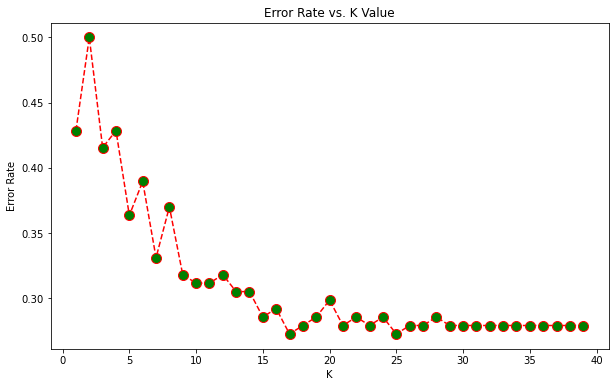

At K = 17 , minimum error is 0.2727272727272727


In [38]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_t,y_t)
 pred_i = knn.predict(x_te)
 error_rate.append(1-accuracy_score(y_te, pred_i))

pl.figure(figsize=(10,6))
pl.plot(range(1,40),error_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
pl.title('Error Rate vs. K Value')
pl.xlabel('K')
pl.ylabel('Error Rate')
pl.show()
print("At K =",error_rate.index(min(error_rate))+1,", minimum error is",min(error_rate))

In [41]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_t, y_t)

KNeighborsClassifier(n_neighbors=17)

In [43]:
y_pred = knn.predict(x_te)
accuracy_score(y_te, y_pred)

0.7272727272727273